In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import yaml
import pprint
import os
import time
# weights and biases for tracking of metrics
import wandb 
# make the plots inline again
%matplotlib inline
# sometimes have to activate this to plot plots in notebook
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from code import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
num_bins = 16

ISF = Interval_Spline_Flow(num_bins=num_bins,
                           num_dim=1,
                           mask_alternate_flag=True,
                           rezero_flag = False, 
                           num_dim_conditioner=None,
                           num_hidden=HIDDEN_DIM_SPLINE_MLP)

ISF.to(device)

x = torch.linspace(-1,1,100).to(device).view(-1,1)
out, ldj = ISF(x)

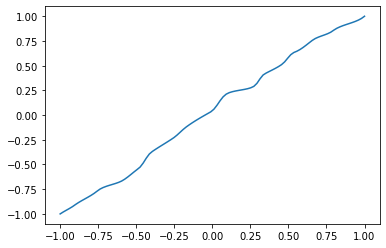

In [7]:
plt.plot(x.cpu().detach().numpy(),out.cpu().detach().numpy())

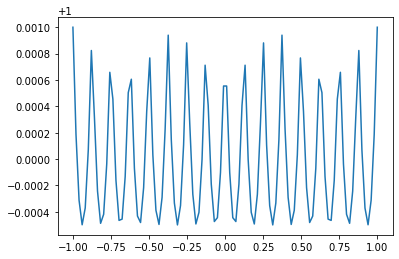

In [4]:
plt.plot(x.cpu().detach().numpy(),torch.exp(ldj).cpu().detach().numpy())

In [15]:
CSF = Circular_Spline_Flow(num_bins=num_bins, 
                            num_dim_conditioner=1, 
                            rezero_flag = True, 
                            num_dim_out = 1,
                            num_hidden=HIDDEN_DIM_SPLINE_MLP)
CSF.to(device)

x_conditioner = torch.randn(1,1).repeat(100,1).to(device)
theta = torch.linspace(0,2*np.pi,100).to(device).view(-1,1).to(device)
r = torch.ones(100,1).to(device)

out, ldj = CSF(theta, r, x_conditioner)

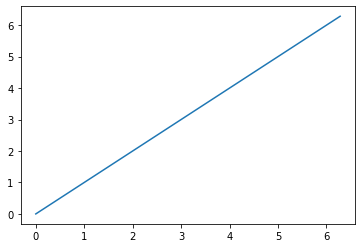

In [16]:
plt.plot(theta.cpu().detach().numpy(),out.cpu().detach().numpy())

In [17]:
out[-1]

tensor([6.2832], device='cuda:0', grad_fn=<SelectBackward>)

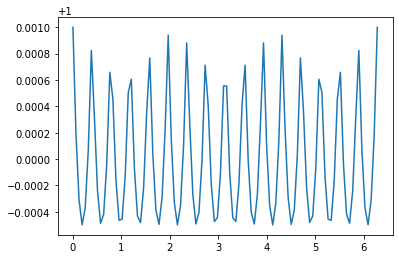

In [16]:
plt.plot(theta.cpu().detach().numpy(),torch.exp(ldj).cpu().detach().numpy())